# Cap. 8 - Scipy



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Interpolação

O submódulo `scipy.interpolate` contém uma ampla variedade de funções para realizar interpolação de dados em 1 ou 2 dimensões.

Vamos começar com o caso 1d.

### Interpolação em uma variável

Nesse caso, a função a ser usada é `scipy.interpolate.interp1d`. Data uma lista de pontos $(x,y)$, essa função retorna uma outra função que retorna os valores $y$ para valores de $x$ num dado intervalo. O padrão da função é fazer uma interpolação linear entre os pontos, mas isso pode ser modificado por meio do parâmetro `kind`. A tabela abaixo mostra as demais possibilidades.

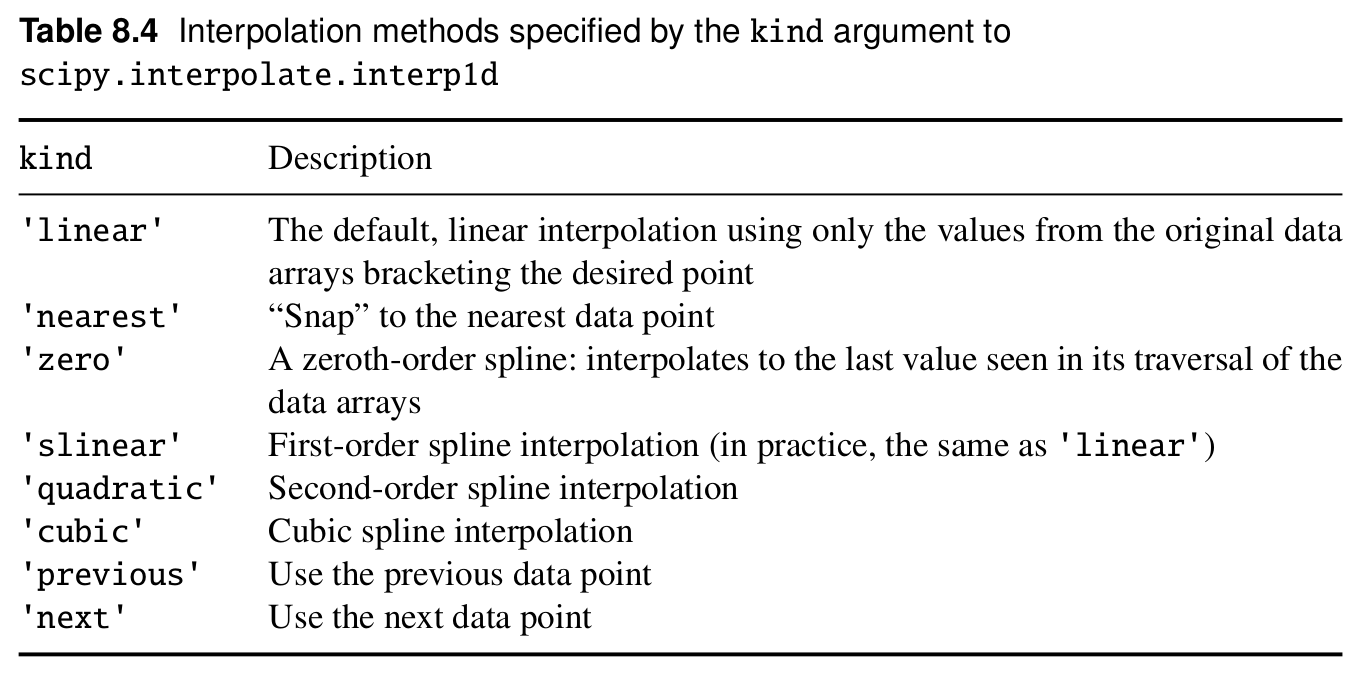

Vejamos um exemplo típico.

*Exemplo E8.19*

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
A, nu, k = 10, 4, 2

def func(x, A, nu, k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)

xmax, nx = 0.5, 8
x = np.linspace(0, xmax, nx)
y = func(x, A, nu, k)

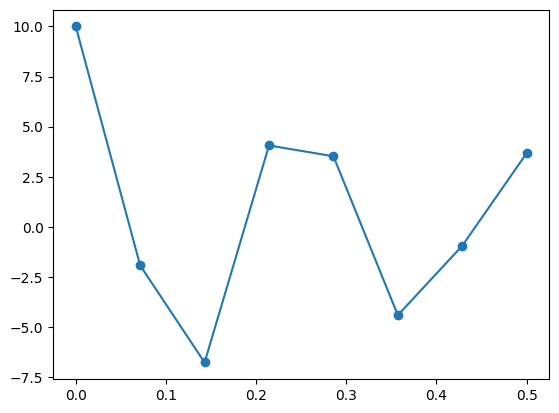

In [ ]:
#dado simples de uma oscilação amortecida
plt.plot(x,y,'-o')

In [ ]:
kinds = ['linear','nearest','zero','slinear','quadratic','cubic','previous', 'next']
f_kind = [interp1d(x, y, kind=kind) for kind in kinds]

In [ ]:
f_kind[0]

In [ ]:
f_kind[0](0.05)

array(1.64971064)

In [ ]:
f_kind[0](-0.1)

ValueError: A value (-0.1) in x_new is below the interpolation range's minimum value (0.0).

In [ ]:
f_kind[0](np.linspace(0.,0.5))

array([10.        ,  8.29585931,  6.59171863,  4.88757794,  3.18343726,
        1.47929657, -0.22484411, -1.9289848 , -2.62064075, -3.3122967 ,
       -4.00395265, -4.69560861, -5.38726456, -6.07892051, -6.77057646,
       -5.22311467, -3.67565287, -2.12819108, -0.58072929,  0.9667325 ,
        2.5141943 ,  4.06165609,  3.98441378,  3.90717146,  3.82992915,
        3.75268684,  3.67544453,  3.59820221,  3.5209599 ,  2.38787735,
        1.2547948 ,  0.12171225, -1.0113703 , -2.14445285, -3.2775354 ,
       -4.41061795, -3.9154323 , -3.42024665, -2.92506101, -2.42987536,
       -1.93468971, -1.43950407, -0.94431842, -0.28387373,  0.37657096,
        1.03701565,  1.69746034,  2.35790503,  3.01834972,  3.67879441])

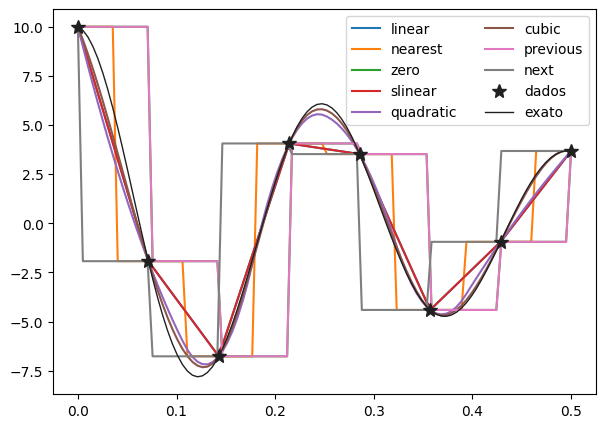

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

x2 = np.linspace(0, xmax, 100)
for i, kind in enumerate(kinds):
    ax.plot(x2, f_kind[i](x2), label=kind)

ax.plot(x, y,'-*',color='#202020', label='dados', linewidth=0, ms=10)
ax.plot(x2, func(x2, A, nu, k),'-',color='#202020', label='exato', linewidth=1)

ax.legend(ncols=2)

### Interpolação em duas variáveis

Nesse caso, a função a ser usada é `scipy.interpolate.interp2d` (depreciada) ou `scipy.interpolate.RegularGridInterpolator`. Novamente, o padrão é usar uma interpolação linear, mas as outras possibilidade são "nearest", "slinear", "cubic", "quintic" e "pchip".

Vejamos um exemplo.

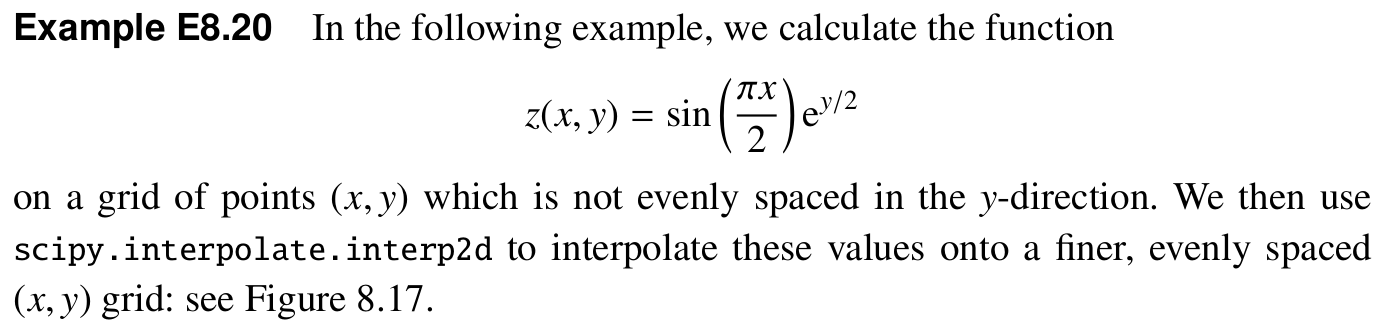

In [ ]:
from scipy.interpolate import interp2d

In [ ]:
x = np.linspace(0, 4, 13)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X/2) * np.exp(Y/2)

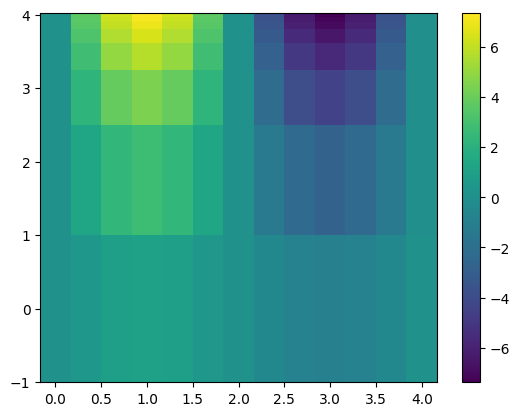

In [ ]:
plt.pcolormesh(X,Y,Z)
plt.colorbar()

In [ ]:
kinds = ["linear", "cubic", "quintic"]

In [ ]:
x2 = np.linspace(0, 4, 50)
y2 = np.linspace(0, 4, 50)
X2, Y2 = np.meshgrid(x2, y2)

fs = [interp2d(x, y, Z, kind=kind) for kind in kinds]
Zs = [f(x2,y2) for f in fs]

<ipython-input-17-6defcbee6374>:5: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  fs = [interp2d(x, y, Z, kind=kind) for kind in kinds]
<ipython-input-17-6defcbee6374>:6: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular 

In [ ]:
Zs[0]

array([[ 0.00000000e+00,  1.22448980e-01,  2.44897959e-01, ...,
        -2.44897959e-01, -1.22448980e-01, -2.44929360e-16],
       [ 0.00000000e+00,  1.31036810e-01,  2.62073621e-01, ...,
        -2.62073621e-01, -1.31036810e-01, -2.62107224e-16],
       [ 0.00000000e+00,  1.39624641e-01,  2.79249283e-01, ...,
        -2.79249283e-01, -1.39624641e-01, -2.79285088e-16],
       ...,
       [ 0.00000000e+00,  8.34200078e-01,  1.66840016e+00, ...,
        -1.66840016e+00, -8.34200078e-01, -1.66861408e-15],
       [ 0.00000000e+00,  8.68685734e-01,  1.73737147e+00, ...,
        -1.73737147e+00, -8.68685734e-01, -1.73759423e-15],
       [ 0.00000000e+00,  9.04782379e-01,  1.80956476e+00, ...,
        -1.80956476e+00, -9.04782379e-01, -1.80979678e-15]])

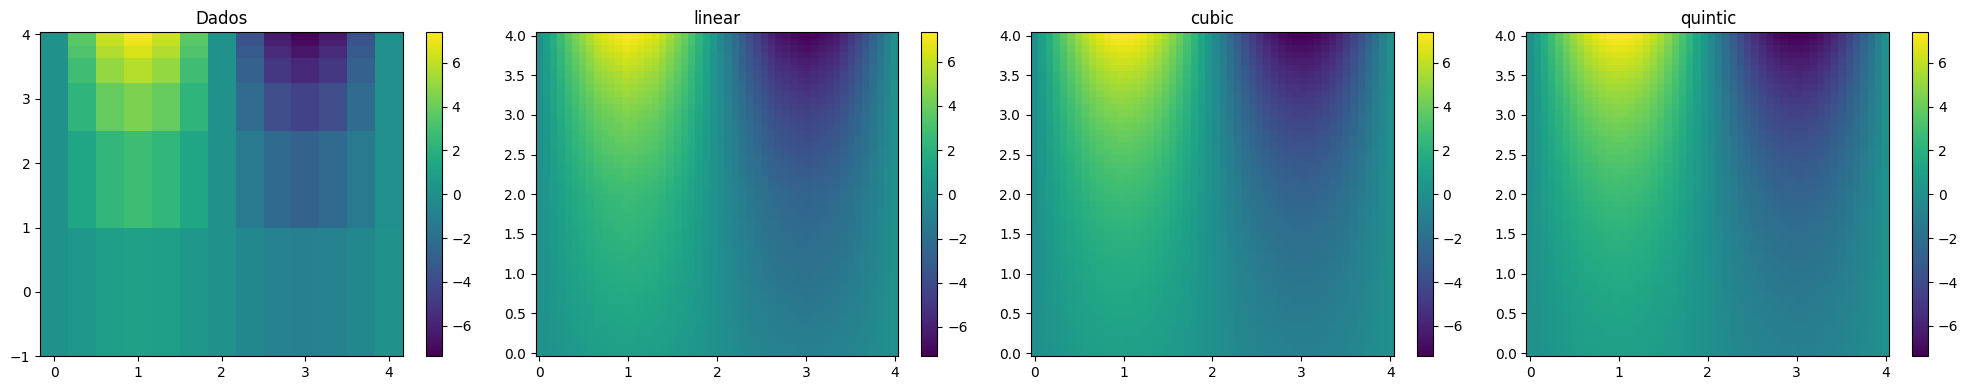

In [ ]:
f, ax = plt.subplots(ncols=4,figsize=(5*4,4))

pc = ax[0].pcolormesh(X,Y,Z)
ax[0].set_title('Dados')
f.colorbar(pc)

for i in range(1,4):
    pc = ax[i].pcolormesh(X2,Y2,Zs[i-1])
    f.colorbar(pc)
    ax[i].set_title(kinds[i-1])

f.tight_layout()

No caso de dados que formam um grid regularmente espaçado, é melhor usar `scipy.interpolate.RectBivariateSpline` por uma questão de eficiência computacional.

Vejamos outro exemplo.

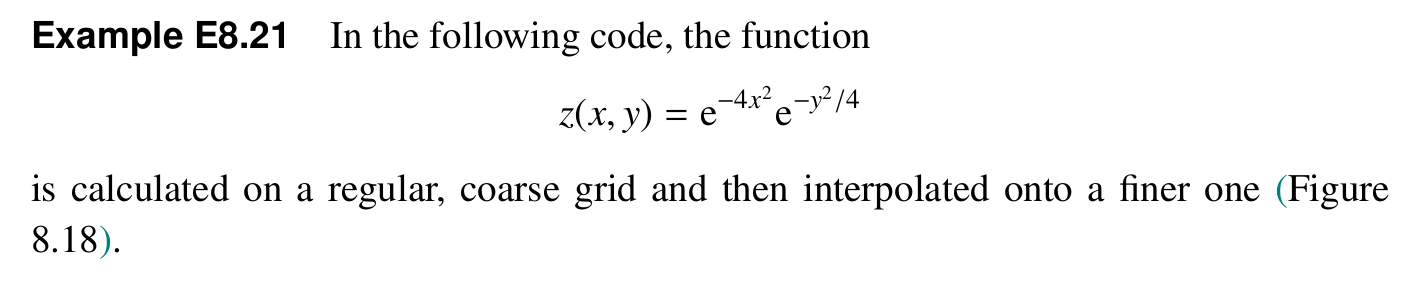

In [ ]:
from scipy.interpolate import RectBivariateSpline

In [ ]:
dx, dy = 0.4, 0.4
xmax, ymax = 2, 4
x = np.arange(-xmax, xmax, dx)
y = np.arange(-ymax, ymax, dy)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(2*X)**2 - (Y/2)**2)

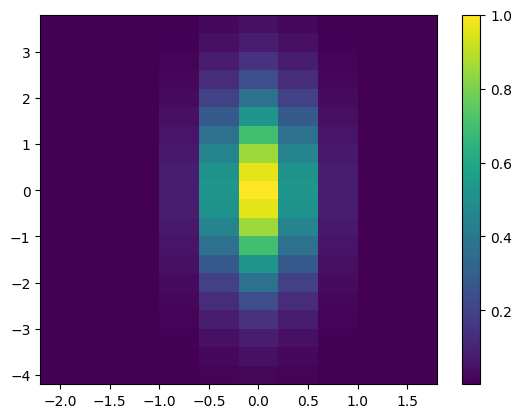

In [ ]:
plt.pcolormesh(X,Y,Z)
plt.colorbar()

In [ ]:
?RectBivariateSpline

In [ ]:
interp_spline = RectBivariateSpline(y, x, Z)

In [ ]:
dx2, dy2 = 0.05, 0.05
x2 = np.arange(-xmax, xmax, dx2)
y2 = np.arange(-ymax, ymax, dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = interp_spline(y2, x2)

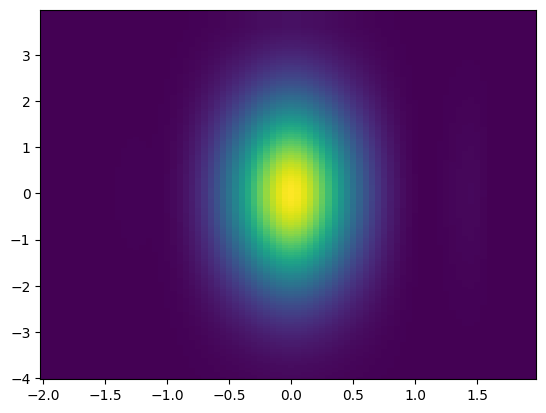

In [ ]:
plt.pcolormesh(X2,Y2,Z2)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

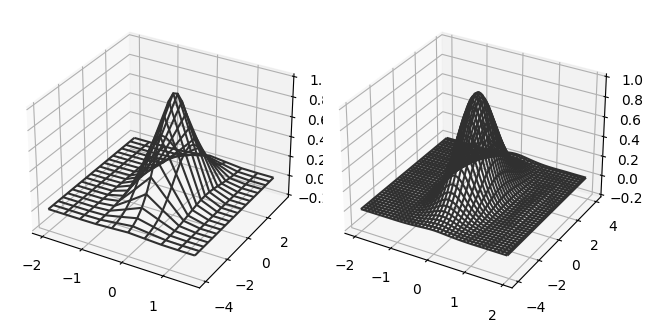

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': '3d'})

ax[0].plot_wireframe(X, Y, Z, color='#303030')

ax[1].plot_wireframe(X2, Y2, Z2, color='#303030')

for ax_ in ax:
    ax_.set_zlim(-0.2,1)
    # ax_.set_axis_off()

f.tight_layout()

### Interpolação de dados não estruturados

Podemos usar ainda a função `scipy.interpolate.griddata` para interpolar dados distribuídos irregularmente no plano $(x,y)$.

Vejamos um exemplo.

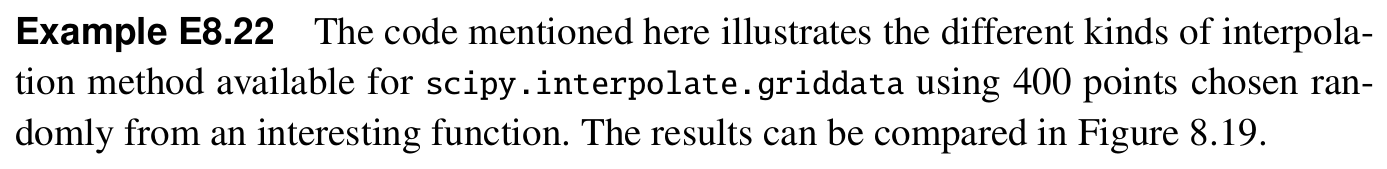

In [ ]:
from scipy.interpolate import griddata

In [ ]:
x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

def func(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi)
    return 5*(1-tau) + tau

T = func(X, Y)

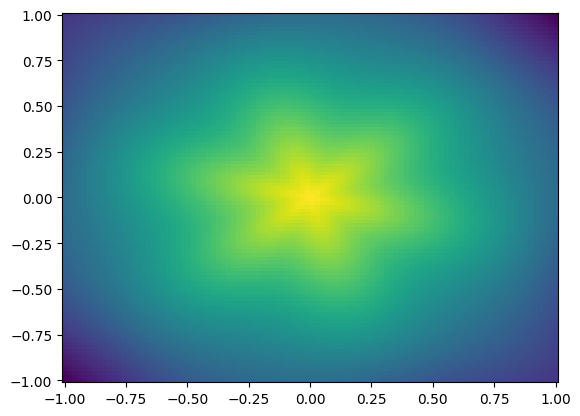

In [ ]:
plt.pcolormesh(X,Y,T)

In [ ]:
npts = 400
rsel_i = np.random.randint(0,100,size=(400))
rsel_j = np.random.randint(0,100,size=(400))

In [ ]:
px = X[rsel_i,rsel_j]
py = Y[rsel_i,rsel_j]
pz = T[rsel_i,rsel_j]

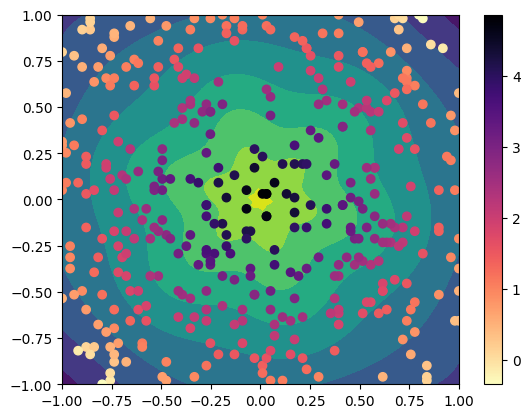

In [ ]:
plt.contourf(X, Y, T)
plt.scatter(px,py,c=pz,cmap='magma_r')
plt.colorbar()

In [ ]:
kinds = ['nearest', 'linear', 'cubic']

In [ ]:
?griddata

In [ ]:
Ts = [griddata((px, py), pz, (X, Y), method=method) for method in kinds]

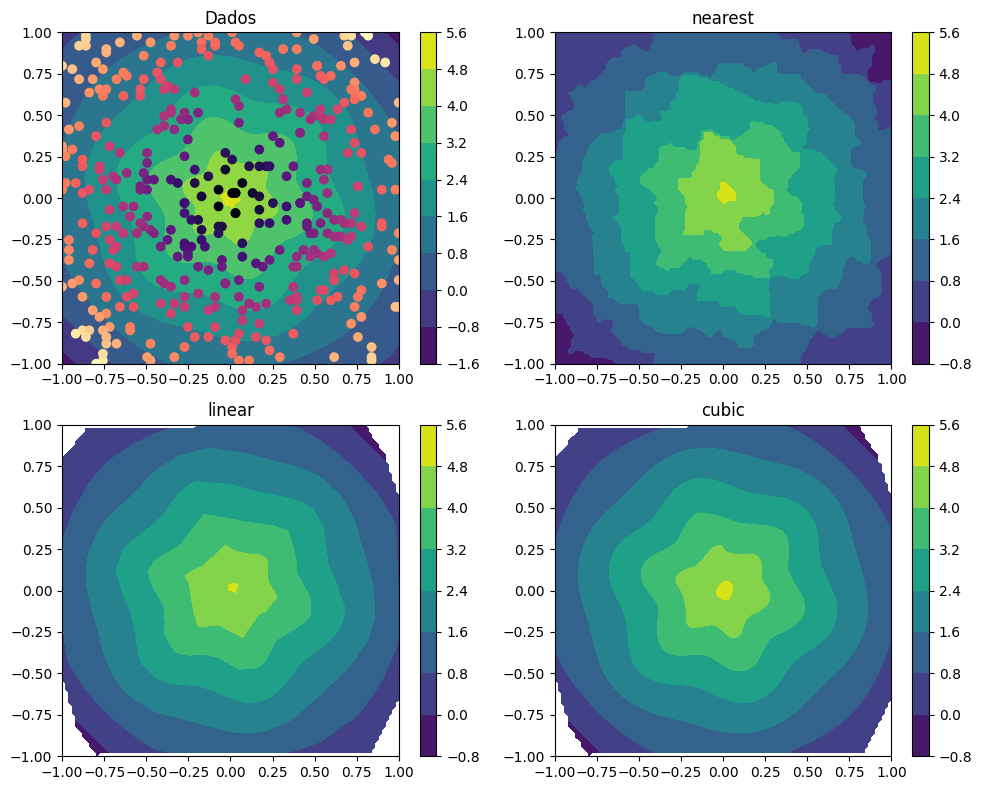

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

ax = ax.flatten()

pc = ax[0].contourf(X,Y,T)
ax[0].set_title('Dados')
ax[0].scatter(px,py,c=pz,cmap='magma_r')
f.colorbar(pc)

for i in range(1,4):
    pc = ax[i].contourf(X,Y,Ts[i-1])
    f.colorbar(pc)
    ax[i].set_title(kinds[i-1])

f.tight_layout()

## Optimização de funções

O scipy oferece métodos para minimizar funções de uma ou várias variáveis. Alguns desses métodos requerem como parâmetros o Jacobiano ou até mesmo a matriz Hessiana do problema:


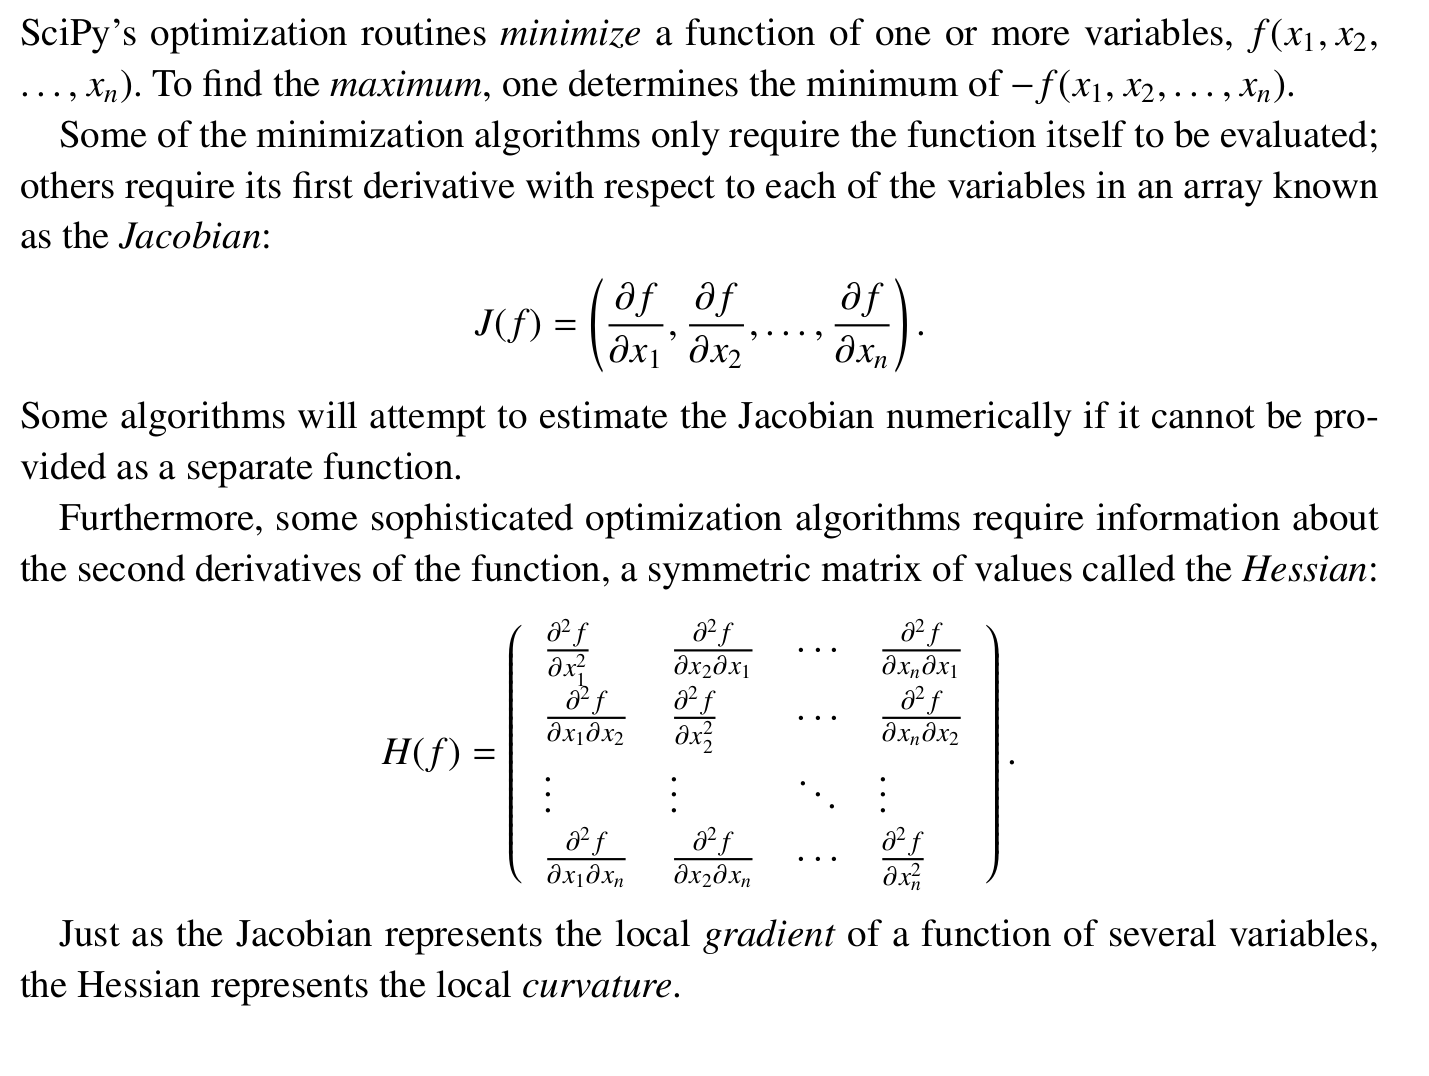

O método geral para minimizar funções escalares é o `scipy.optimize.minimize`. O retorno desse método é um dicionário com as seguintes informações:

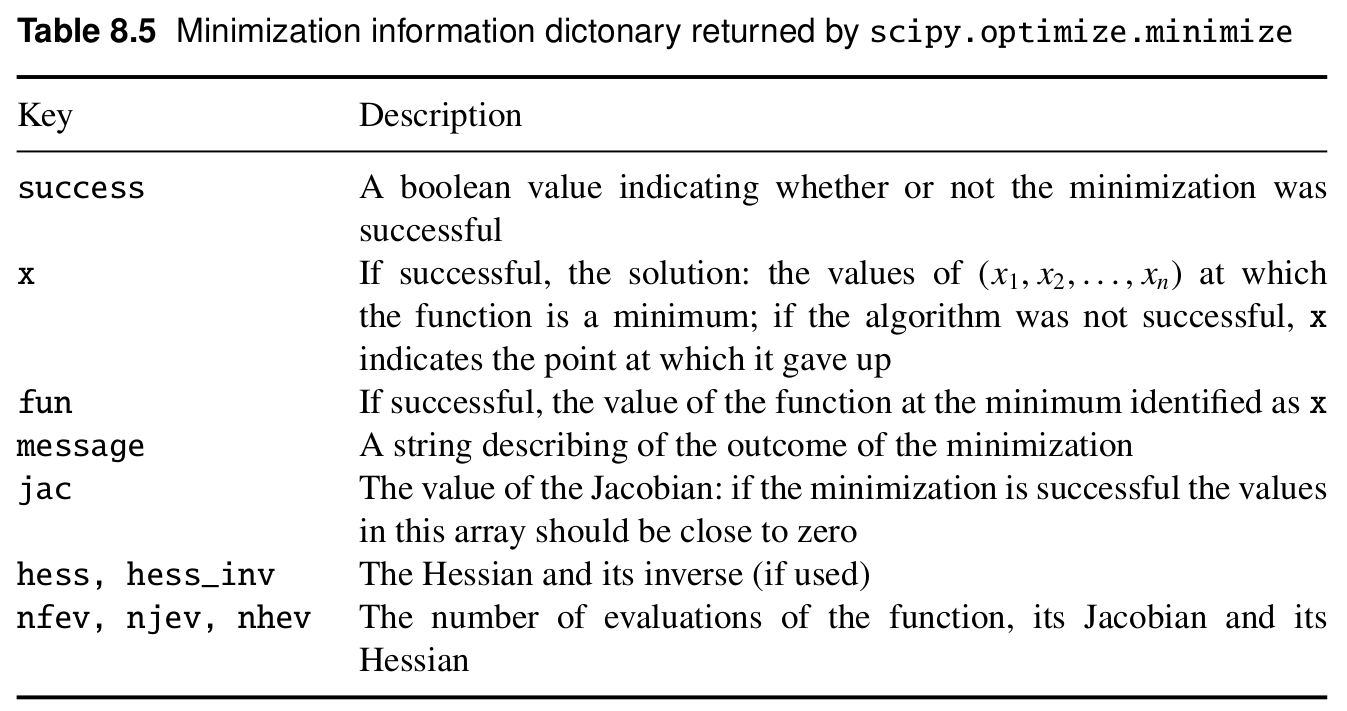

O algoritmo usado por padrão é o [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm), um método bastante geral que não requer nem o Jacobiano nem a matriz Hessiana para operar. Outras possibilidades são mostradas na tabela abaixo:

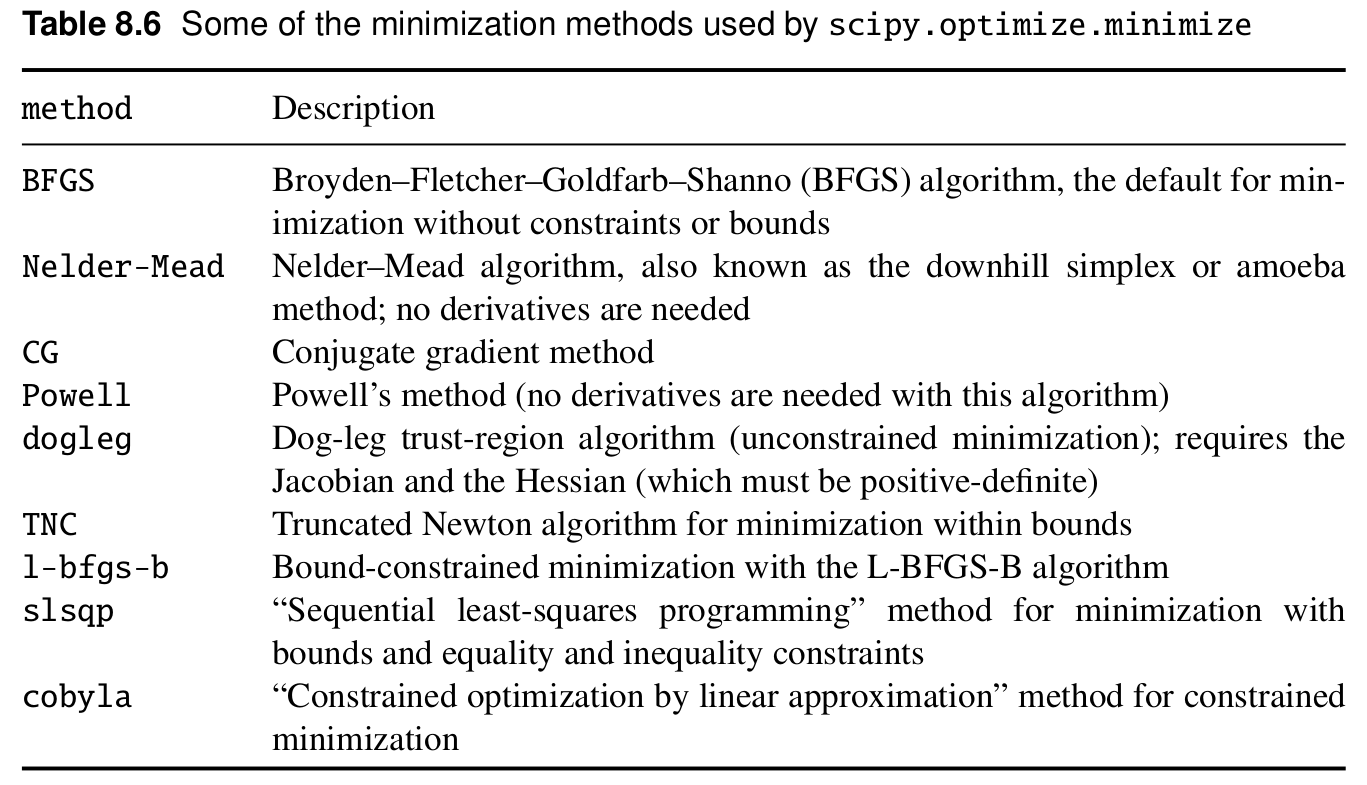

Vejamos um exemplo com a função de Himmelblau:

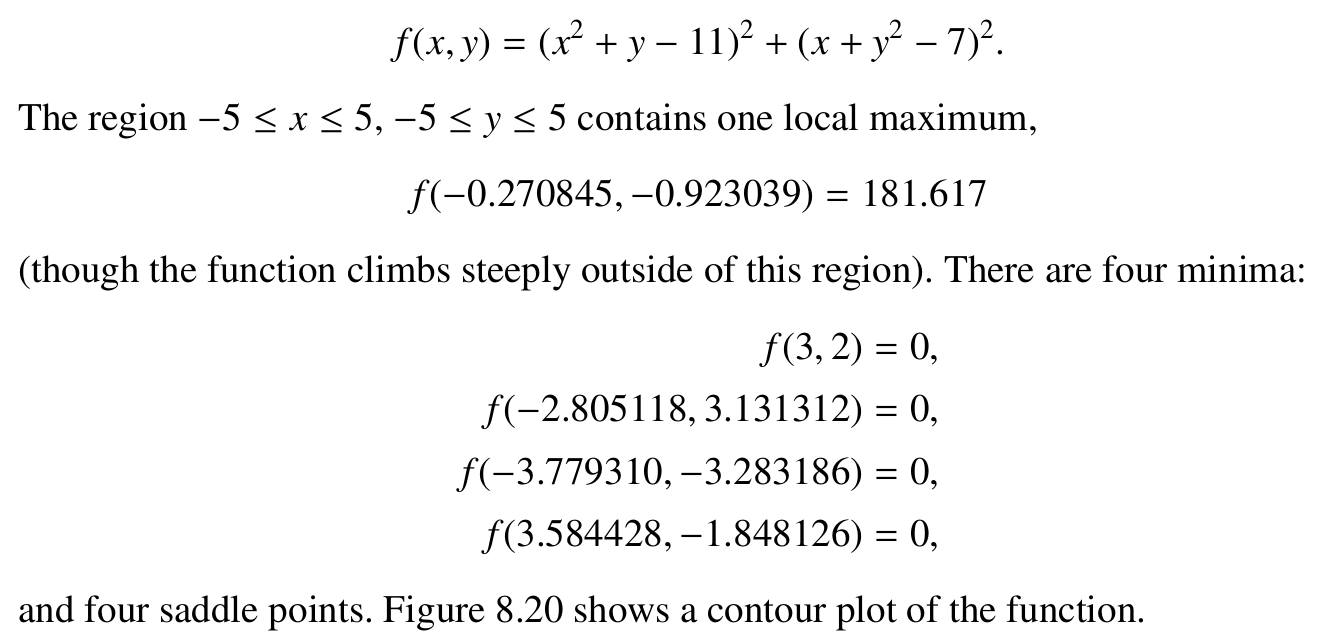

In [ ]:
def func(X):
    x, y = X
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

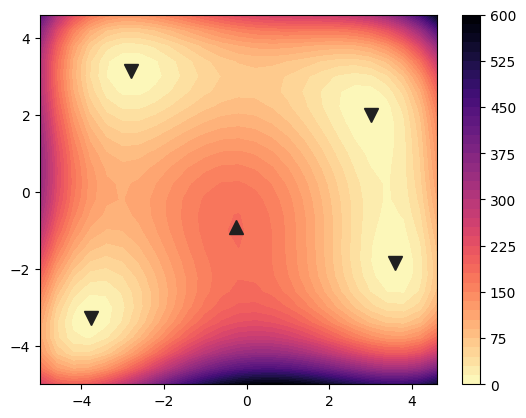

In [ ]:
dx, dy = 0.4, 0.4
xmax, ymax = 5, 5
x = np.arange(-xmax, xmax, dx)
y = np.arange(-ymax, ymax, dy)
X, Y = np.meshgrid(x, y)
Z = func((X,Y))

plt.contourf(X,Y,Z,levels=50,cmap='magma_r')
plt.colorbar()

maxs = np.asarray([[-0.270845, -0.923039]])
mins = np.asarray([[3,2],
                   [-2.805118, 3.131312],
                   [-3.779310, -3.283186],
                   [3.584428, -1.848126]])

plt.plot(maxs[::,0],maxs[::,1],'^',c='#202020',ms=10)

plt.plot(mins[::,0],mins[::,1],'v',c='#202020',ms=10)

In [ ]:
from scipy.optimize import minimize

In [ ]:
#função e um chute inicial
minimize(func, (-2, 0))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.870935582756473e-13
        x: [-2.805e+00  3.131e+00]
      nit: 9
      jac: [-1.259e-06  9.200e-06]
 hess_inv: [[ 1.539e-02 -2.049e-04]
            [-2.049e-04  1.289e-02]]
     nfev: 39
     njev: 13

In [ ]:
#para encontrar o máximo, minimizamos -f
mf = lambda X: -func(X)
res = minimize(mf, (0.1, -0.2))
res
#note que o BFGS não convergiu

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -8122685219740.452
        x: [ 9.881e+02 -1.636e+03]
      nit: 2
      jac: [-3.857e+09  1.753e+10]
 hess_inv: [[ 3.043e-02  6.698e-03]
            [ 6.698e-03  1.474e-03]]
     nfev: 351
     njev: 113

In [ ]:
# Nelder–Mead https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method
# também não requer derivadas
res = minimize(mf, (0.1, -0.2), method='Nelder-Mead')
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -181.61652150067573
             x: [-2.709e-01 -9.230e-01]
           nit: 39
          nfev: 77
 final_simplex: (array([[-2.709e-01, -9.230e-01],
                       [-2.709e-01, -9.230e-01],
                       [-2.708e-01, -9.230e-01]]), array([-1.816e+02, -1.816e+02, -1.816e+02]))

In [ ]:
res.x

array([-0.27087419, -0.9230486 ])

In [ ]:
maxs

array([[-0.270845, -0.923039]])

Em alguns casos, pode ser preciso procurar por mínimos ou máximos sujeitos a algum vínculo ou limitados em uma dada região. Para esses casos, podemos usar `l-bfgs-b`, `tnc` ou `slsqp`.

Para especificar as regiões onde procurar os extremos, passamos o parâmetro `bounds`.


In [ ]:
xbounds = (None, 0)
ybounds = (None, 0)
bounds = (xbounds,ybounds)
res = minimize(func, (-0.5, -0.5), bounds=bounds, method='slsqp')
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 4.115667606325133e-08
       x: [-3.779e+00 -3.283e+00]
     nit: 11
     jac: [-2.836e-03 -3.424e-04]
    nfev: 39
    njev: 11

In [ ]:
res.x

array([-3.77933774, -3.28319868])

In [ ]:
res2 = minimize(func, (-0.5, -0.5), method='slsqp')
res2

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 4.0198726971069946e-07
       x: [-2.805e+00  3.131e+00]
     nit: 10
     jac: [-7.211e-03  3.771e-04]
    nfev: 36
    njev: 10

In [ ]:
res2.x

array([-2.80522924,  3.131319  ])

No caso de vínculos, podemos fazer:

In [ ]:
con = {'type': 'eq', 'fun': lambda X: X[0] - X[1]}

Os possíveis `types` são: `eq` (para igualdades) e `ineq` (inequações).

In [ ]:
minimize(func, (0, 0), constraints=con , method='slsqp')

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 8.000000000716087
       x: [ 2.541e+00  2.541e+00]
     nit: 7
     jac: [-1.633e+01  1.633e+01]
    nfev: 25
    njev: 7

Para o caso de funções de uma variável, podemos usar `scipy.optimize.minimize_scalar`, como no exemplo a seguir.

In [ ]:
from scipy.optimize import minimize_scalar
Polynomial = np.polynomial.Polynomial

In [ ]:
fpoli = Polynomial((48., 28., -24., -3., 1.))

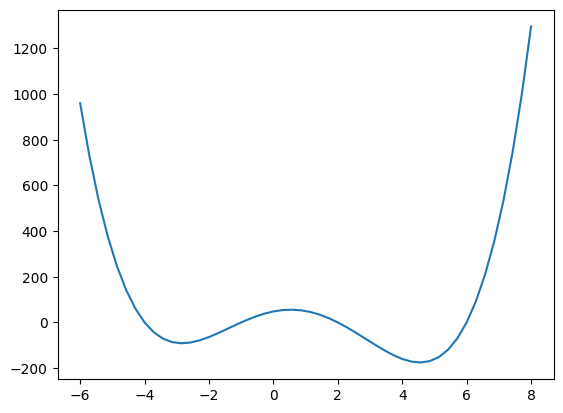

In [ ]:
x = np.linspace(-6,8)
plt.plot(x,fpoli(x))

In [ ]:
?minimize_scalar

In [ ]:
minimize_scalar(fpoli)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -91.32163915433344
       x: -2.841044326595826
     nit: 10
    nfev: 14

## Mínimos quadrados e ajuste de funções

A função `scipy.optimize.leastsq` implemente o método de mínimos quadrados, qual minimiza a diferença entre um conjunto de dados $y$ e uma função $f$.

Vamos considerar o caso em que queremos ajustar a função

$$
f(t) = A e^{-t/\tau} \cos 2\pi\nu t
$$


In [ ]:
A, freq, tau = 10, 4, 0.5

def func(t, A, freq, tau):
    return A*np.exp(-t/tau)*np.cos(2*np.pi*freq*t)

tmax, dt = 1, 0.01
t = np.arange(0, tmax , dt)
yexact = func(t, A, freq, tau)

y = yexact + 2*np.random.randn(len(yexact))

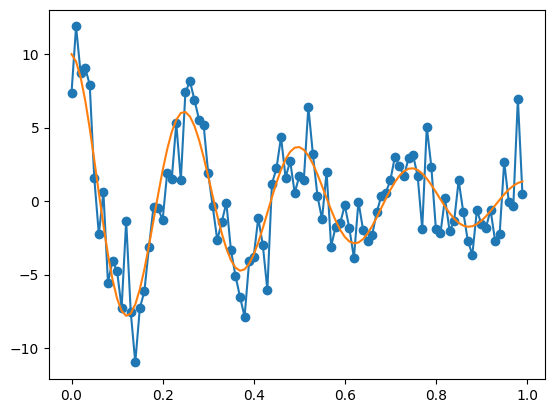

In [ ]:
plt.plot(t,y,'-o')
plt.plot(t,yexact,'-')

In [ ]:
from scipy.optimize import leastsq

In [ ]:
??leastsq

In [ ]:
def residuals(p, y, t):
    A, freq, tau = p #p é uma tupla com os parâmetros

    return y - func(t, A, freq, tau)

In [ ]:
#chute inicial para A, freq e tau
p0 = 5, 5, 1

In [ ]:
plsq = leastsq(residuals, p0, args=(y, t))

In [ ]:
#10, 4, 0.5
plsq[0]

array([9.85705385, 3.96863579, 0.49740096])

In [ ]:
A, freq, tau

(10, 4, 0.5)

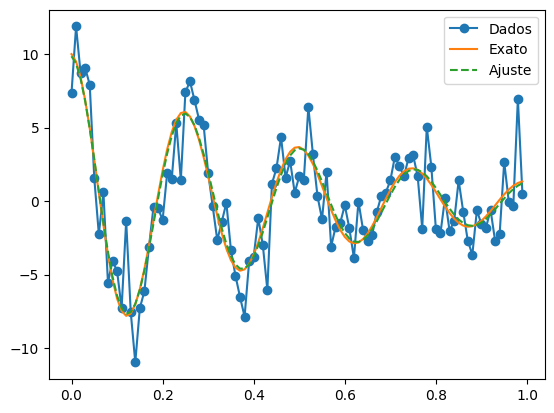

In [ ]:
plt.plot(t,y,'-o',label='Dados')
plt.plot(t,yexact,'-',label='Exato')
plt.plot(t,func(t,*plsq[0]),'--',label='Ajuste')
plt.legend()

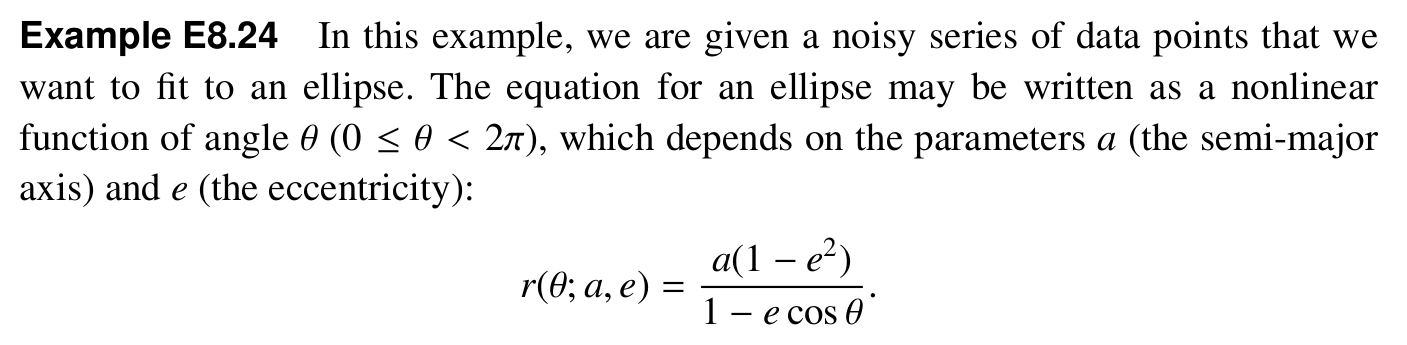

In [ ]:
def func(theta, p):
    a, e = p
    return a * (1 - e**2)/(1 - e*np.cos(theta))

# Dados
theta = np.array([0.0000,0.4488,0.8976,1.3464,1.7952,2.2440,2.6928,
                  3.1416,3.5904,4.0392,4.4880,4.9368,5.3856,5.8344,6.2832])
r = np.array([4.6073, 2.8383, 1.0795, 0.8545, 0.5177, 0.3130, 0.0945, 0.4303,
              0.3165, 0.4654, 0.5159, 0.7807, 1.2683, 2.5384, 4.7271])

def residuals(p, r, theta):
    return r - func(theta, p)

def jac(p, r, theta):
    a, e = p
    da = (1 - e**2)/(1 - e*np.cos(theta))
    de = (-2*a*e*(1-e*np.cos(theta)) + a*(1-e**2)*np.cos(theta))/(1 -
                                                        e*np.cos(theta))**2
    return -da, -de #sinal de menos porque queremos o mínimo

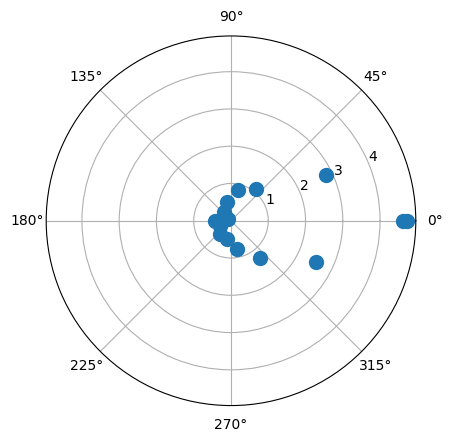

In [ ]:
plt.polar(theta, r,'o',ms=10)

In [ ]:
p0 = (1, 0.5)
plsq = leastsq(residuals, p0, Dfun=jac, args=(r, theta),
                        col_deriv=True)
plsq

(array([2.47915456, 0.87929513]), 1)

In [ ]:
p0 = (1, 0.5)
plsq = leastsq(residuals, p0, args=(r, theta))
plsq

(array([2.47915456, 0.87929513]), 1)

In [ ]:
plsq[0]

array([2.47915456, 0.87929513])

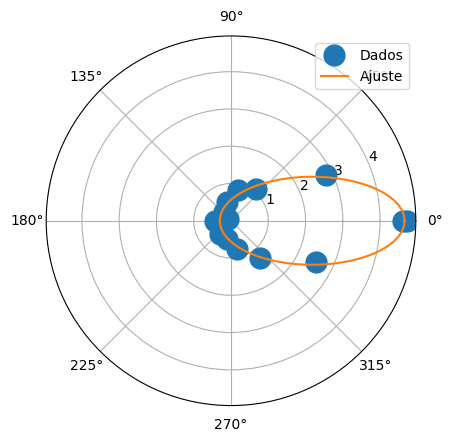

In [ ]:
plt.polar(theta, r, 'o', label='Dados',ms=15)

theta_grid = np.linspace(0, 2*np.pi, 200)
plt.polar(theta_grid, func(theta_grid, plsq[0]),'-',label='Ajuste')
plt.legend()

Também podemos usar a função `scipy.optimize.curve_fit` para ajuste de curvas. Nesse caso, a função a ser ajustada é passada diretamente como argumento.

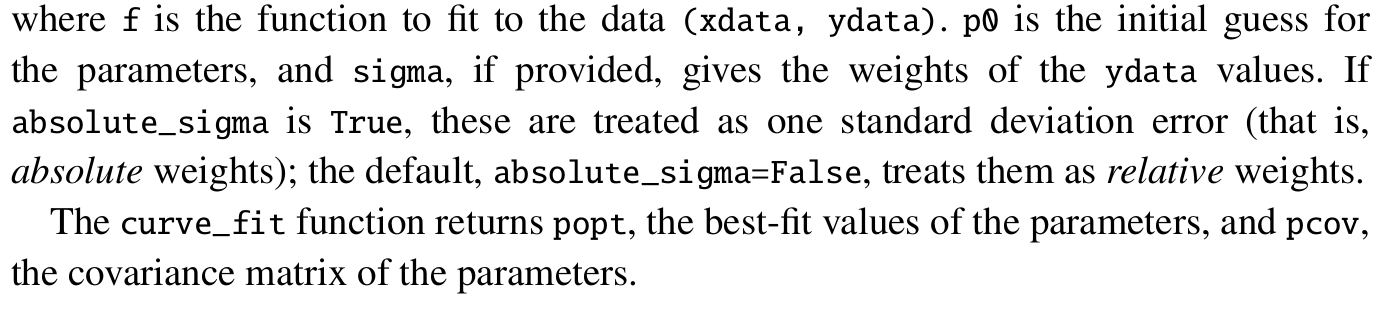

Vejamos um exemplo.

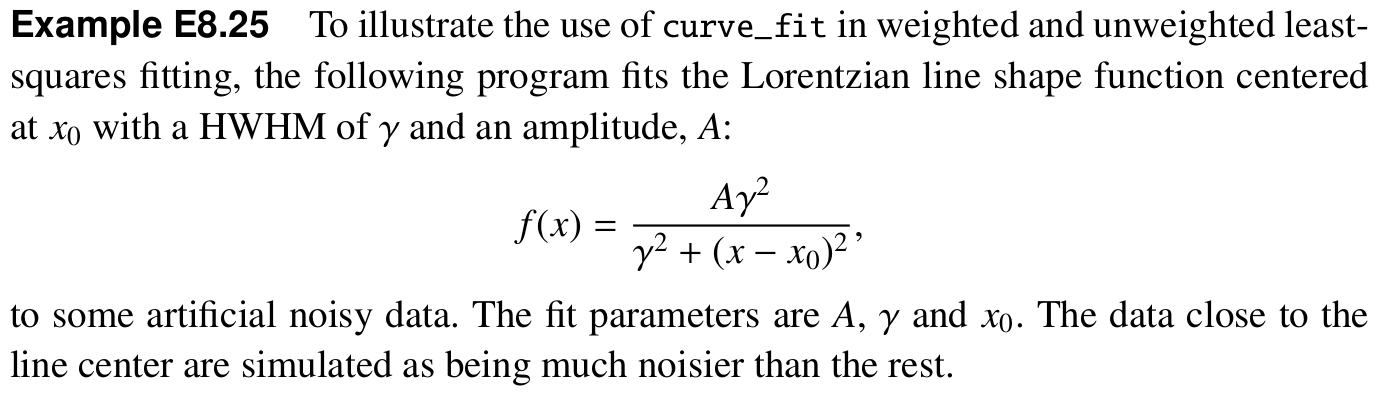

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
x0, A, gamma = 12, 3, 5

n = 200
x = np.linspace(1, 20, n)
yexact = A * gamma**2 / (gamma**2 + (x-x0)**2)

#estimativa de erro
sigma = np.ones(n)*0.5
sigma[np.abs(x-x0+1)<1] = 3

noise = np.random.randn(n)*sigma
y = yexact + noise

<ErrorbarContainer object of 3 artists>

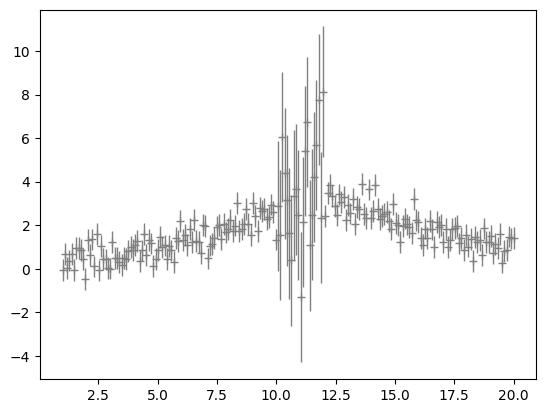

In [ ]:
plt.errorbar(x, y, yerr=sigma, lw=0, marker='+', c='0.5',elinewidth=1)

In [ ]:
def f(x, x0, A, gamma):
    return A *gamma**2 / (gamma**2 + (x-x0)**2)

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

In [ ]:
# Unweighted fit
p0 = 10, 4, 2
popt, pcov = curve_fit(f, x, y, p0)
yfit = f(x, *popt)

In [ ]:
popt

array([12.05265474,  3.43157052,  4.38671264])

In [ ]:
#erros nas estimativas
np.sqrt(np.diag(pcov))

array([0.19424364, 0.15375704, 0.31029191])

In [ ]:
x0, A, gamma

(12, 3, 5)

In [ ]:
#root mean square error
rms(yexact, yfit)

2.6333586580033304

In [ ]:
#fit com peso
popt2, pcov2 = curve_fit(f, x, y, p0, sigma=sigma, absolute_sigma=True)
yfit2 = f(x, *popt2)

In [ ]:
popt2

array([12.14794851,  3.0878484 ,  4.94749254])

In [ ]:
np.sqrt(np.diag(pcov2))

array([0.13932314, 0.10586725, 0.2423079 ])

In [ ]:
#root mean square error
rms(yexact, yfit2)

0.8648517364206573

(-1.0, 4.0)

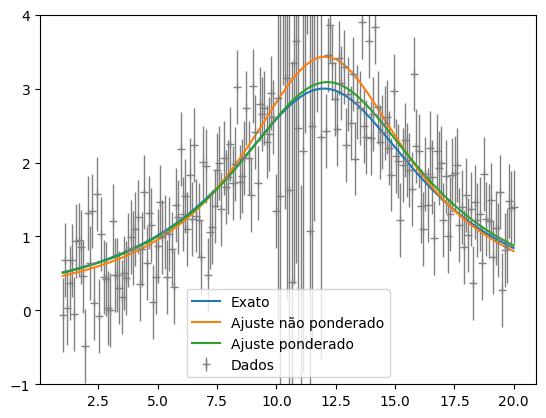

In [ ]:
plt.errorbar(x, y, yerr=sigma, lw=0, marker='+', c='0.5', elinewidth=1, label='Dados')
plt.plot(x, yexact, label='Exato')
plt.plot(x, yfit, label='Ajuste não ponderado')
plt.plot(x, yfit2, label='Ajuste ponderado')
plt.legend()
plt.ylim(-1, 4)

## Raízes de função

O submódulo `scipy.optimize` também oferece vários métodos para cálculo. Vamos usar algums para o caso de funções de uma variável.

Por exemplo, considere a função:

$$
f(x) = 1/5 + x \cos(3/x)
$$

cujo gráfico está abaixo.

In [ ]:
f = lambda x: 1/5. + x*np.cos(3./x)
x = np.linspace(-1, 1, 1000)

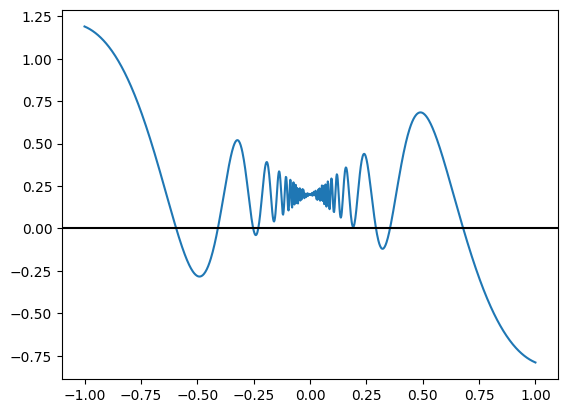

In [ ]:
plt.plot(x, f(x))
plt.axhline(0, color='k')

Observamos que a função tem várias raízes. Vamos usar o método da bissecção.

![](https://upload.wikimedia.org/wikipedia/commons/d/d9/Bisection_anime.gif "f")


In [ ]:
from scipy.optimize import bisect

In [ ]:
bisect(f,-0.7,-0.5)

-0.5933306271021138

In [ ]:
bisect(f,0.5,1)

0.6796987012294267

In [ ]:
f(0.6796987012294267)

-1.1001477506766832e-12

## Problemas do Capítulo 8

In [ ]:
estutandes_pos = [
    "Anna Lucchi", "Adriano Neves", "Carlos Batistela", "Gabriel Colombo",
    "Hugo Machado", "Jean Passos", "Jhonatan Berrar", "Leonardo Voltarelli",
    "Luiz Pantaleão", "Marcelo Oliveira", "Manoel Souza", "Mateus Tarozo",
    "Mônica Prates", "Vitor Ribeiro"
]

estudantes_grad = [
    "ABIMAEL LINO RIBEIRO", "ANA CRISTINA SANTOS VIEIRA",
    "ANGELO AGGIO FLORES", "ARÃO VICTOR ROCHA DOS SANTOS",
    "BRUNO MAIA DE SOUZA", "CAMILA DOS SANTOS SOUZA",
    "CHRISTIAN MOREIRA MENDES", "CRISTIAN LOPES DOS SANTOS", "ENZO CALIALI",
    "FERNANDO HENRIQUE MOREIRA VALDIR", "GABRIEL CARDOSO DE MORAES",
    "GABRIEL MARTINS DUBAS", "GILMAR HORCHULHAK", "GIOVANNI ENZO DELMONACO",
    "GRAZIELLA DIAS DE MENDONÇA", "IAN CAPÉL VENDRAMIN",
    "JOÃO GUILHERME DE SOUZA CAMPAGNOLI", "JOAO PEDRO FULGENCIO DO NASCIMENTO",
    "JOHNATAN ZACARIOTO GOMES", "JOSÉ LEONARDO OLER", "JÚLIA DE SOUZA FLÓES",
    "KESLER PIERRE", "LEONARDO BAPTISTA DE PAULA NETO",
    "LEONARDO VINÍCIOS OLIVEIRA BRANCO", "LIEDSON ROCHA MARQUES",
    "LUCIANO SOARES DOS PRASERES JUNIOR", "MARCELO GUARNIERI",
    "MARCELO RYU DA ROCHA", "MARIA JULIA COSTA MISTURA",
    "MATHEUS ALVES DA SILVA", "MATHEUS BELASQUE MONTEIRO DE LIMA",
    "MATHEUS DI DOMENICO", "MICHEL RUAN ALVES CARVALHO",
    "NICOLAS DA SILVA FERNANDES", "PEDRO HENRIQUE MEDEIROS MONTALBAN",
    "PIETRO GIUSEPPE CARGNIN FERREIRA", "RAFAELA LAVAGNOLI",
    "RENATO HIROAKI IVANAGA", "ROSE MOURA QUIRINO", "RUDAH ALVES LEITE",
    "SAMUEL SALVADOR DOS SANTOS", "SOPHIA HELLEN DE ASSIS DOMINGUES",
    "THAINA GOMES PEREIRA ZAMPIERI", "Vitor Hugo Ferrari Ribeiro",
    "Kaique Gabriel Boldrin"
]

In [ ]:
range_problemas_caps6e7 = [
    ["P8.1.1", "P8.1.6"],
    ["P8.2.1", "P8.2.9"],
    ["P8.4.1", "P8.4.4"],
]

In [ ]:
lista_problemas = []
for range_p in range_problemas_caps6e7:
    i_min=int(range_p[0].split('.')[-1])
    i_max=int(range_p[1].split('.')[-1])

    prefix = '.'.join(range_p[0].split('.')[:2])

    for i in range(i_min,i_max+1):
        lista_problemas.append(f"{prefix}.{i}")

In [ ]:
print(f"Total de problemas no capítulo 8: {len(lista_problemas)}")

Total de problemas no capítulo 8: 19


In [ ]:
print(f"Total de estudantes de graduação....: {len(estudantes_grad)}")
print(f"Total de estudantes de pós-graduação: {len(estutandes_pos)}")
print(" "*37+"+--")
print(" "*38+f"{len(estutandes_pos)+len(estudantes_grad)}")

Total de estudantes de graduação....: 45
Total de estudantes de pós-graduação: 14
                                     +--
                                      59


In [ ]:
import numpy as np

n_problemas = 5

problemas_estudantes = {}

for estudante in estutandes_pos+estudantes_grad:
    problemas_sel = np.random.choice(lista_problemas,size=n_problemas,replace=False)
    problemas_estudantes[estudante.title()] = sorted(list(problemas_sel))

In [ ]:
len(np.unique(np.hstack(list(problemas_estudantes.values()))))

19

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(problemas_estudantes).T
df.tail()

,0,1,2,3,4
Samuel Salvador Dos Santos,P8.1.4,P8.2.3,P8.2.5,P8.2.6,P8.2.7
Sophia Hellen De Assis Domingues,P8.1.3,P8.1.4,P8.1.5,P8.2.2,P8.4.2
Thaina Gomes Pereira Zampieri,P8.1.4,P8.1.5,P8.2.1,P8.2.8,P8.4.2
Vitor Hugo Ferrari Ribeiro,P8.1.6,P8.2.1,P8.2.2,P8.2.5,P8.4.2
Kaique Gabriel Boldrin,P8.1.5,P8.1.6,P8.2.3,P8.2.5,P8.4.1


In [ ]:
df.to_excel('problemas_cap_8.xlsx')